In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 101

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
print(X_tst.shape)

cfg = additive_1x2_uniform_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(10201, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_01_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform/model-400000


2019-01-30 02:24:14,822:INFO:Restoring parameters from experiments/additive_1x2_uniform/model-400000
2019-01-30 02:24:18,633:INFO:TEST BATCH-0: t = 3.7691, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,641:INFO:TEST BATCH-1: t = 3.7721, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,648:INFO:TEST BATCH-2: t = 3.7749, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,654:INFO:TEST BATCH-3: t = 3.7776, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,661:INFO:TEST BATCH-4: t = 3.7803, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,667:INFO:TEST BATCH-5: t = 3.7828, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,673:INFO:TEST BATCH-6: t = 3.7853, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,678:INFO:TEST BATCH-7: t = 3.7877, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,684:INFO:TEST BATCH-8: t = 3.7901, Net_Loss: -0.222798, Revenue: 0.222798
2019-01-30 02:24:18,689:INFO:TEST BATCH-9: t = 3.7924

2019-01-30 02:24:19,059:INFO:TEST BATCH-86: t = 4.0209, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,063:INFO:TEST BATCH-87: t = 4.0239, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,068:INFO:TEST BATCH-88: t = 4.0273, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,074:INFO:TEST BATCH-89: t = 4.0311, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,078:INFO:TEST BATCH-90: t = 4.0342, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,083:INFO:TEST BATCH-91: t = 4.0377, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,088:INFO:TEST BATCH-92: t = 4.0418, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,092:INFO:TEST BATCH-93: t = 4.0447, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,097:INFO:TEST BATCH-94: t = 4.0480, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,102:INFO:TEST BATCH-95: t = 4.0512, Net_Loss: -0.833259, Revenue: 0.833259
2019-01-30 02:24:19,107:INFO:TEST BATCH-96: t = 4.

In [11]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D)

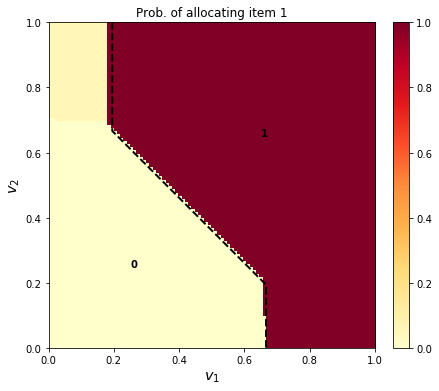

In [6]:
x1 = (2.0 - np.sqrt(2.0))/3.0
x2 = 2.0/3.0
points = [(x1, 1.0), (x1, x2), (x2, x1), (x2, 0)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))


fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
plt.text(0.25, 0.25, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.65, 0.65, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

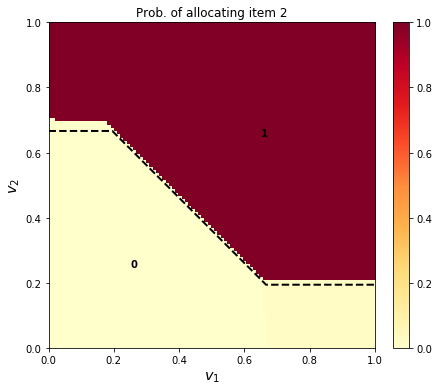

In [7]:
x1 = (2.0 - np.sqrt(2.0))/3.0
x2 = 2.0/3.0
points = [(0.0, x2), (x1, x2), (x2, x1), (1.0, x1)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
plt.text(0.25, 0.25, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.65, 0.65, s='1', color='black', fontsize='10', fontweight='bold')
    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)